## Decsion trees

In [737]:
import numpy as np
import pandas as pd


In [738]:
data = pd.read_csv('./data/D2.csv')

In [739]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted
0,AfricanAmerican,Female,[80-90),1,3,7,1,Invalid,33,0,...,No,No,No,No,No,No,Steady,False,True,1
1,Caucasian,Female,[70-80),1,3,5,3,Invalid,48,2,...,No,No,No,No,No,No,Steady,False,True,1
2,Caucasian,Female,[50-60),3,1,1,3,Orthopedics,25,1,...,No,No,No,No,No,No,Steady,False,True,0
3,AfricanAmerican,Female,[50-60),1,1,7,6,Invalid,41,0,...,No,No,No,No,No,No,Steady,False,True,1
4,AfricanAmerican,Male,[80-90),1,3,7,4,Invalid,22,0,...,No,No,No,No,No,No,Steady,False,True,1


In [740]:
# Drop the columns with missing values
d2 = data.drop(['A1Cresult', 'max_glu_serum'], axis=1)
    

In [741]:
d2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted
0,AfricanAmerican,Female,[80-90),1,3,7,1,Invalid,33,0,...,No,No,No,No,No,No,Steady,False,True,1
1,Caucasian,Female,[70-80),1,3,5,3,Invalid,48,2,...,No,No,No,No,No,No,Steady,False,True,1
2,Caucasian,Female,[50-60),3,1,1,3,Orthopedics,25,1,...,No,No,No,No,No,No,Steady,False,True,0
3,AfricanAmerican,Female,[50-60),1,1,7,6,Invalid,41,0,...,No,No,No,No,No,No,Steady,False,True,1
4,AfricanAmerican,Male,[80-90),1,3,7,4,Invalid,22,0,...,No,No,No,No,No,No,Steady,False,True,1


### Steps to preprocess the data

- Revisit the data pre-processing steps from assignment 1
- Drop the columns with missing values - A1Cresult and max_glu_serum
- Reduce the number of unique values in the medical_specialty column, the admission_type_id column, the discharge_disposition_id column, and the admission_source_id column
- Convert the categorical columns into numerical columns using encoding
- Split the data into training and testing sets


In [742]:
specialty = d2['medical_specialty'].copy()

In [743]:
# Set the condtions
conditions = [
    specialty.str.contains('Surg|Anesth|Ortho', case=False, regex=True),
    specialty.str.contains('Family|Outreach', case=False, regex=True),
    specialty.str.contains('Internal|Neph|Urol|Card|nfect|Pulmo|Endoc|Gastro|Hospital|Diag|Obs|Gyn|Haem|Onc', case=False, regex=True),
    specialty.str.contains('Emerg|Trauma', case=False, regex=True),
    specialty == '?'

]

# Set the choices
choices = ['Surgical',  'General Practice',  'Internal Medicine',
           'Emergency', 'Invalid']

In [744]:
d2['medical_specialty'] = np.select(conditions, choices, default='Other')

In [745]:
d2['medical_specialty'].value_counts(normalize=True)*100

medical_specialty
Other                64.960
Internal Medicine    14.355
Emergency            10.885
Surgical              6.015
General Practice      3.785
Name: proportion, dtype: float64

In [746]:
# Set conditions based on admission_type_id
conditions = [
    d2['admission_type_id'].isin([1, 2, 7]),
    d2['admission_type_id'].isin([3,4]),
    d2['admission_type_id'].isin([5, 6, 8])
]

# Set the choices
choices = [
    'Emergency',
    'Elective',
    'Unknown'
]


In [747]:
d2['admission_type'] = np.select(conditions, choices, default='Not available')

In [748]:
d2['admission_type'].value_counts()

admission_type
Emergency    14910
Elective      4006
Unknown       1084
Name: count, dtype: int64

In [749]:
# drop rows where discharge dispositon is deceased. This makes sense because the patient is no longer alive to be readmitted and would likely introduce noise in the model
d2 = d2[~d2['discharge_disposition_id'].isin([11, 19, 20, 21])]

In [750]:
# Define conditions and choices
conditions = [
    d2['discharge_disposition_id'].isin([2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 22, 23, 24, 27, 28, 29, 30]),
    d2['discharge_disposition_id'].isin([1]),
    d2['discharge_disposition_id'].isin([7, 18, 25, 26]),

]

choices = [
    'Additional care',
    'Discharged home',
    'Unknown'
]



In [751]:
d2['discharge_disposition'] = np.select(conditions, choices, default='Unknown')

In [752]:
d2['discharge_disposition'].value_counts()

discharge_disposition
Discharged home    11867
Additional care     7671
Unknown              142
Name: count, dtype: int64

In [753]:
# Define conditions and choices
conditions = [
    d2['admission_source_id'].isin([1, 2, 3]),
    d2['admission_source_id'].isin([4, 5, 6, 10, 22, 25]),
    d2['admission_source_id'].isin([7, 8]),
    d2['admission_source_id'].isin([9, 15, 17, 20, 21])
]

choices = [
    'Referral',
    'Transfer',
    'Emergency',
    'Unknown'
]

In [754]:
d2['admission_source'] = np.select(conditions, choices, default='Not available')

In [755]:
d2['admission_source'].value_counts()

admission_source
Emergency    12736
Referral      6214
Transfer       454
Unknown        276
Name: count, dtype: int64

In [756]:
d2.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1, inplace=True)

In [757]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19680 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   race                   19680 non-null  object
 1   gender                 19680 non-null  object
 2   age                    19680 non-null  object
 3   time_in_hospital       19680 non-null  int64 
 4   medical_specialty      19680 non-null  object
 5   num_lab_procedures     19680 non-null  int64 
 6   num_procedures         19680 non-null  int64 
 7   num_medications        19680 non-null  int64 
 8   number_outpatient      19680 non-null  int64 
 9   number_emergency       19680 non-null  int64 
 10  number_inpatient       19680 non-null  int64 
 11  number_diagnoses       19680 non-null  int64 
 12  metformin              19680 non-null  object
 13  repaglinide            19680 non-null  object
 14  nateglinide            19680 non-null  object
 15  chlorpropamide         1

### Convert the binary columns to numerical columns

- The columns `change`, `diabetesMed`, `readmitted` are binary columns. Convert them to numerical columns using encoding
- The column `readmitted` has three unique values. Convert it to a binary column


In [758]:
# Booleans columns are converted to integers explicitly to align with other encoding
d2['change'] = d2['change'].astype(int)
d2['diabetesMed'] = d2['diabetesMed'].astype(int)

In [759]:
d2.diabetesMed.value_counts()

diabetesMed
1    15544
0     4136
Name: count, dtype: int64

In [760]:
# other binary columns to be converted to numerical columns
d2['gender'] = d2['gender'].map({'Female': 1, 'Male': 0})

In [761]:
d2.gender.value_counts()

gender
1    10604
0     9076
Name: count, dtype: int64

In [762]:
d2.metformin.value_counts()

metformin
No        15459
Steady     3923
Up          196
Down        102
Name: count, dtype: int64

In [763]:
drug_order = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
d2['metformin'] = d2['metformin'].map(drug_order)
d2['repaglinide'] = d2['repaglinide'].map(drug_order)
d2['nateglinide'] = d2['nateglinide'].map(drug_order)
d2['chlorpropamide'] = d2['chlorpropamide'].map(drug_order)
d2['glimepiride'] = d2['glimepiride'].map(drug_order)
d2['acetohexamide'] = d2['acetohexamide'].map(drug_order)
d2['glipizide'] = d2['glipizide'].map(drug_order)
d2['glyburide'] = d2['glyburide'].map(drug_order)
d2['tolbutamide'] = d2['tolbutamide'].map(drug_order)
d2['insulin'] = d2['insulin'].map(drug_order)


In [765]:
d2.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,admission_type_Elective,admission_type_Emergency,admission_type_Unknown,discharge_disposition_Additional care,discharge_disposition_Discharged home,discharge_disposition_Unknown,admission_source_Emergency,admission_source_Referral,admission_source_Transfer,admission_source_Unknown
0,1,[80-90),1,33,0,14,0,1,1,9,...,0,1,0,1,0,0,1,0,0,0
1,1,[70-80),3,48,2,7,0,0,2,9,...,0,1,0,1,0,0,0,0,1,0
2,1,[50-60),3,25,1,15,0,0,0,8,...,1,0,0,0,1,0,0,1,0,0
3,1,[50-60),6,41,0,19,0,0,0,9,...,0,1,0,0,1,0,1,0,0,0
4,0,[80-90),4,22,0,12,0,0,1,8,...,0,1,0,1,0,0,1,0,0,0


In [766]:
# map age into three categories
d2.age.value_counts().sort_index()

age
[0-10)         9
[10-20)       81
[20-30)      342
[30-40)      676
[40-50)     1766
[50-60)     3220
[60-70)     4339
[70-80)     4963
[80-90)     3742
[90-100)     542
Name: count, dtype: int64

In [767]:
# label encode the age column
age_order = {'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9}
d2['age'] = d2['age'].map(age_order)

In [736]:
# use one-hot encoding for race, medical_specialty, admission_type, discharge_disposition, admission_source
d2 = pd.get_dummies(d2, columns=['race', 'medical_specialty', 'admission_type', 'discharge_disposition', 'admission_source'], dtype=int)

KeyError: "None of [Index(['medical_specialty', 'admission_type', 'discharge_disposition',\n       'admission_source'],\n      dtype='object')] are in the [columns]"

In [768]:
d2.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,admission_type_Elective,admission_type_Emergency,admission_type_Unknown,discharge_disposition_Additional care,discharge_disposition_Discharged home,discharge_disposition_Unknown,admission_source_Emergency,admission_source_Referral,admission_source_Transfer,admission_source_Unknown
0,1,8,1,33,0,14,0,1,1,9,...,0,1,0,1,0,0,1,0,0,0
1,1,7,3,48,2,7,0,0,2,9,...,0,1,0,1,0,0,0,0,1,0
2,1,5,3,25,1,15,0,0,0,8,...,1,0,0,0,1,0,0,1,0,0
3,1,5,6,41,0,19,0,0,0,9,...,0,1,0,0,1,0,1,0,0,0
4,0,8,4,22,0,12,0,0,1,8,...,0,1,0,1,0,0,1,0,0,0


In [769]:
y = d2['readmitted']

In [770]:
X = d2.drop('readmitted', axis=1)

In [771]:
from sklearn.model_selection import train_test_split

In [772]:
rs = 42

In [773]:
X_mat = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)


In [774]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [849]:
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [850]:
model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [851]:
print(f'Training accuracy: {accuracy_score(y_train, model.predict(X_train))}')

Training accuracy: 1.0


In [852]:
print(f'Test accuracy: {accuracy_score(y_test, model.predict(X_test))}')
print(classification_report(y_test, model.predict(X_test)))

Test accuracy: 0.5575880758807588
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      3107
           1       0.53      0.53      0.53      2797

    accuracy                           0.56      5904
   macro avg       0.56      0.56      0.56      5904
weighted avg       0.56      0.56      0.56      5904



In [853]:
importances = model.feature_importances_
feature_names = X.columns

In [854]:
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

indices = indices[:10]

for i in indices:
    print(f'{feature_names[i]}: {importances[i]}')

num_lab_procedures: 0.17608175862222414
num_medications: 0.14991690253665008
time_in_hospital: 0.08592341800370418
age: 0.0723311462062219
number_inpatient: 0.06769944854272662
num_procedures: 0.05557568597522135
number_diagnoses: 0.041102435034545755
insulin: 0.031860911765046525
gender: 0.02808434452820369
number_outpatient: 0.026766441632742097


In [787]:
from sklearn.model_selection import GridSearchCV

In [818]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': [1,5,10,15,20]}

In [868]:
grid_search = GridSearchCV(model, param_grid=params, cv=10, n_jobs=-1, verbose=1, return_train_score=True)

In [869]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 16),
                         'min_samples_leaf': range(5, 25, 5)},
             return_train_score=True, verbose=1)

In [870]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")

Best parameters found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
Best accuracy score: 0.6227475433542766


In [871]:
import matplotlib.pyplot as plt
import pandas as pd

In [872]:
# Convert cv_results_ to a pandas DataFrame
results = pd.DataFrame(grid_search.cv_results_)


In [873]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.026981,0.007776,0.002156,0.001431,gini,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.633527,0.628447,...,0.615825,0.617438,0.615986,0.615825,0.617066,0.615937,0.615937,0.617308,0.615999,0.001035
1,0.023752,0.005840,0.001887,0.001110,gini,1,10,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.633527,0.628447,...,0.615825,0.617438,0.615986,0.615825,0.617066,0.615937,0.615937,0.617308,0.615999,0.001035
2,0.019777,0.001562,0.002647,0.001467,gini,1,15,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.633527,0.628447,...,0.615825,0.617438,0.615986,0.615825,0.617066,0.615937,0.615937,0.617308,0.615999,0.001035
3,0.021979,0.003821,0.003192,0.004554,gini,1,20,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.633527,0.628447,...,0.615825,0.617438,0.615986,0.615825,0.617066,0.615937,0.615937,0.617308,0.615999,0.001035
4,0.028960,0.005852,0.002602,0.002118,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.633527,0.628447,...,0.615825,0.617438,0.615986,0.615825,0.617066,0.615937,0.615937,0.620373,0.616305,0.001649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.076856,0.006672,0.001802,0.000601,entropy,14,20,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.605951,0.595791,...,0.690353,0.692692,0.692370,0.690353,0.691507,0.695943,0.692395,0.692878,0.691694,0.002178
116,0.102464,0.029260,0.001554,0.000791,entropy,15,5,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.584180,0.592163,...,0.752460,0.755767,0.749637,0.744233,0.746431,0.764739,0.759739,0.750060,0.751669,0.006417
117,0.097550,0.017986,0.001358,0.000871,entropy,15,10,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.585631,0.585631,...,0.729634,0.726488,0.727537,0.719552,0.724817,0.732801,0.732882,0.730381,0.727320,0.003982
118,0.081711,0.010724,0.001584,0.001191,entropy,15,15,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.602322,0.586357,...,0.713099,0.709873,0.712212,0.703017,0.705138,0.712396,0.708444,0.710622,0.708656,0.003537


In [875]:
import matplotlib.pyplot as plt


train_result = results.split0_train_score
test_result = results.split0_test_score
print("Total number of models: ", len(test_result))

Total number of models:  120


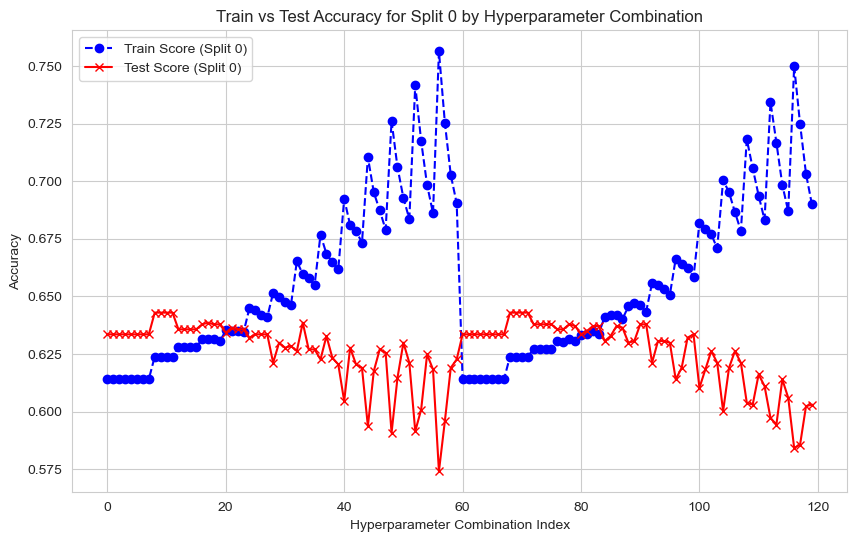

In [879]:
param_max_depth = results['param_max_depth']

# Use the index of hyperparameter combinations for plotting
param_index = range(len(train_result))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_index, train_result, label='Train Score (Split 0)', marker='o', linestyle='--', color='b')
plt.plot(param_index, test_result, label='Test Score (Split 0)', marker='x', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Split 0 by Hyperparameter Combination')
plt.legend()
plt.grid(True)
plt.show()

In [881]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}

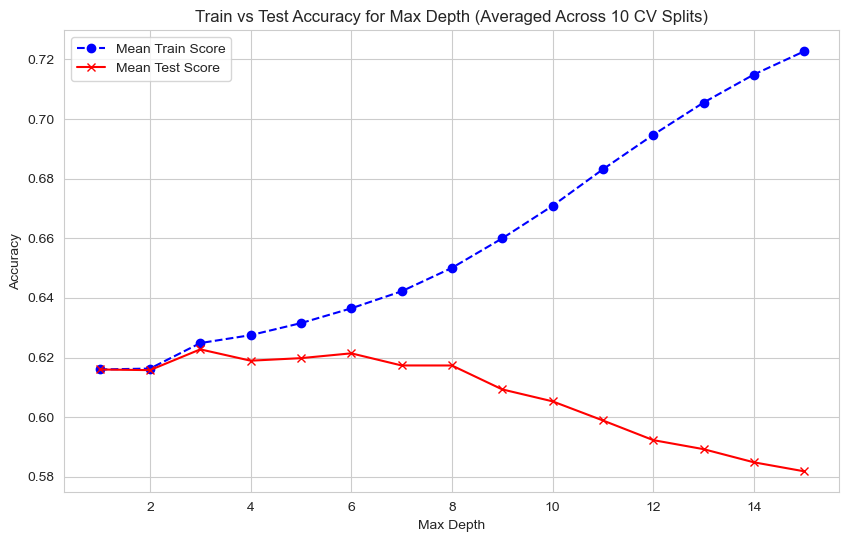

In [883]:
# Group results by max_depth to calculate mean test and train scores
mean_train_scores = results.groupby('param_max_depth')['mean_train_score'].mean()
mean_test_scores = results.groupby('param_max_depth')['mean_test_score'].mean()

# Plot the results for max_depth
plt.figure(figsize=(10, 6))
plt.plot(mean_train_scores.index, mean_train_scores, label='Mean Train Score', marker='o', linestyle='--', color='b')
plt.plot(mean_test_scores.index, mean_test_scores, label='Mean Test Score', marker='x', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Max Depth (Averaged Across 10 CV Splits)')
plt.legend()
plt.grid(True)
plt.show()

In [884]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}

In [886]:
best_params = grid_search.best_params_

In [887]:
best_model = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42  # Keep the random_state for reproducibility
)

In [888]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [889]:
print(f'Training accuracy: {accuracy_score(y_train, best_model.predict(X_train))}')

Training accuracy: 0.6257984901277585


In [891]:
# classification report
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68      3107
           1       0.64      0.50      0.56      2797

    accuracy                           0.63      5904
   macro avg       0.63      0.63      0.62      5904
weighted avg       0.63      0.63      0.63      5904

